<a href="https://colab.research.google.com/github/Saul-Ochoa/RepositorioUPC/blob/main/Estadistica/Estadistica_AnalisisNormalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis de Normalidad**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
df = pd.read_csv(url)
print(df.info())
df.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1


In [3]:
df['male'].value_counts()

0    287
1    257
Name: male, dtype: int64

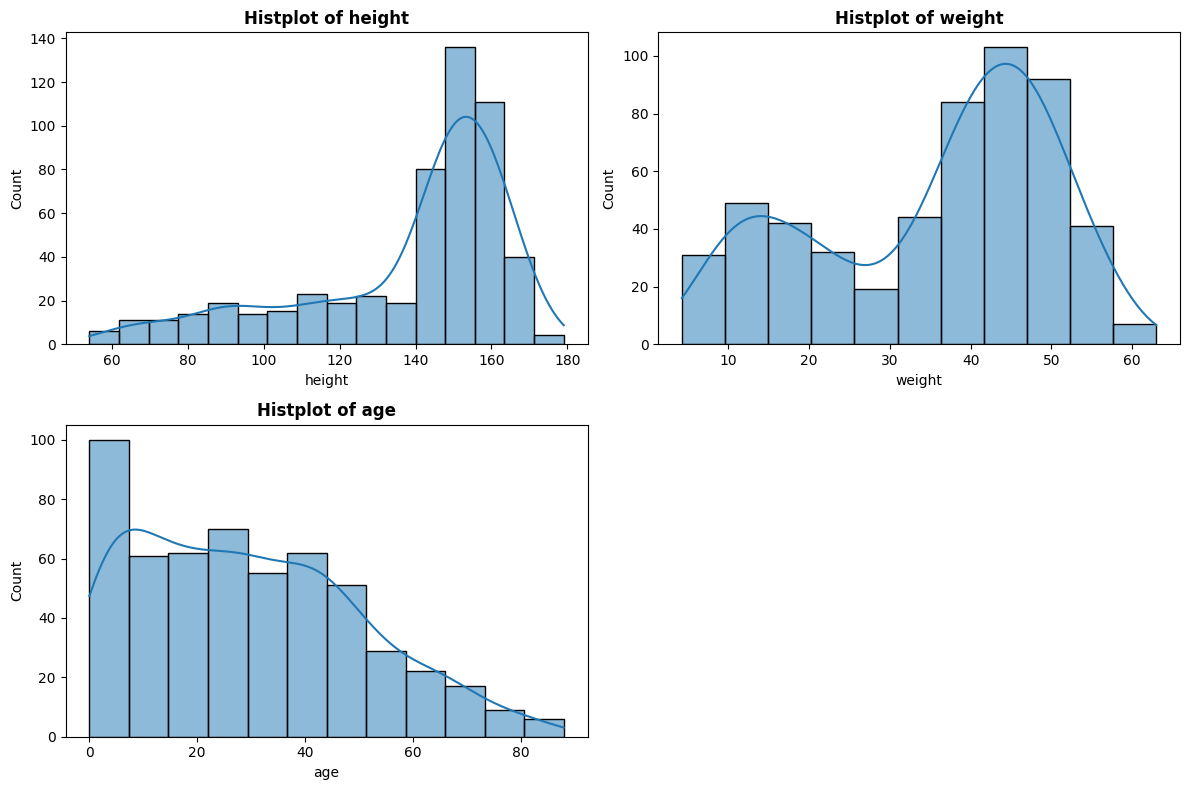

In [4]:
num=['height', 'weight', 'age']
fig = plt.figure(figsize=(12, 8))
for i, var in enumerate(num):
    # Selecciona la subtrama correspondiente en la cuadrícula
    ax = fig.add_subplot(2, 2, i + 1)

    # Crea el gráfico en la subtrama
    sns.histplot(data=df, x=var, ax=ax,kde=True)
    ax.set_title(f'Histplot of {var}', fontsize=12, weight='bold')

# Ajustar la disposición de los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

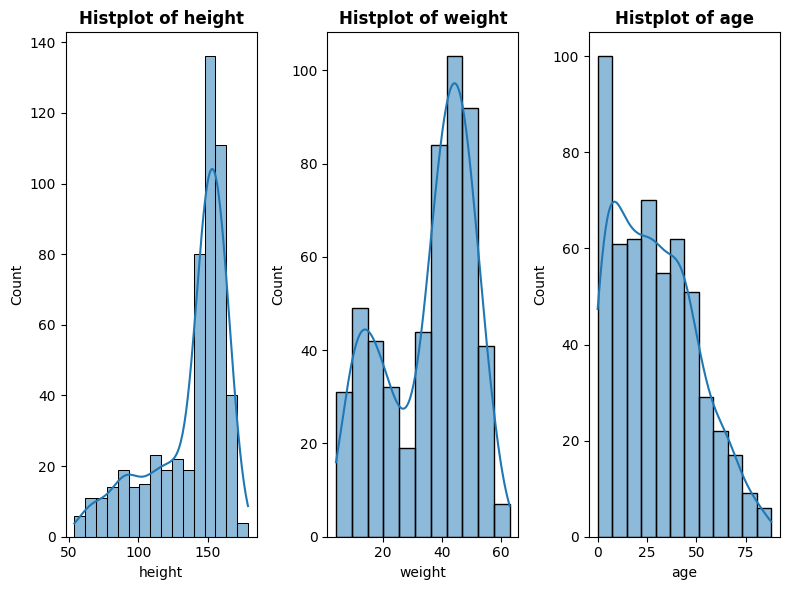

In [5]:
num=['height', 'weight', 'age']
fig=plt.figure(figsize=(8,6))
for i,var in enumerate(num):
  ax=fig.add_subplot(1,3,i+1)
  sns.histplot(data=df,x=var,ax=ax,kde=True)
  ax.set_title(f'Histplot of {var}',fontsize=12,weight='bold')
plt.tight_layout()
plt.show()

* De todos los datos disponibles se seleccionan únicamente mujeres mayores de 15 años

In [6]:
df=df[(df['age']>15) & (df['male']==0)]
weight=df['weight']

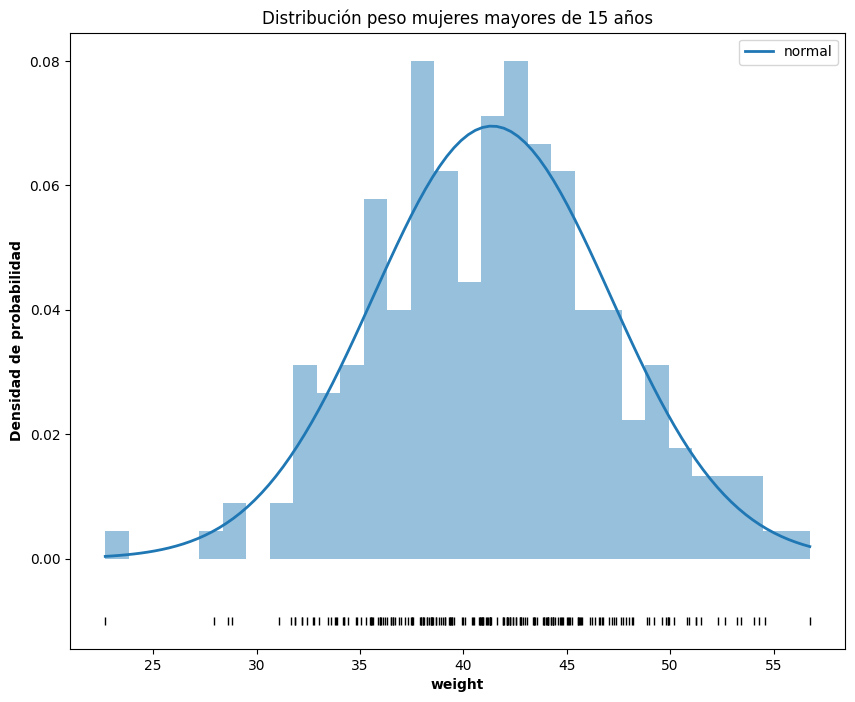

In [7]:
mu, sigma = stats.norm.fit(weight)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(weight), max(weight), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=weight, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(weight, np.full_like(weight, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución peso mujeres mayores de 15 años')
ax.set_xlabel('weight',weight='bold')
ax.set_ylabel('Densidad de probabilidad',weight='bold')
ax.legend()
plt.show()

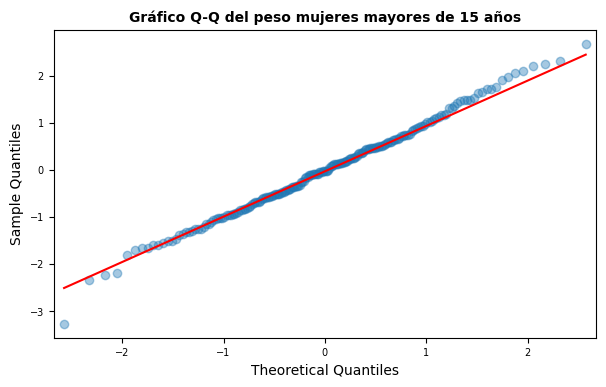

In [8]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    weight,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del peso mujeres mayores de 15 años', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)
plt.show()

## **Métodos analíticos asimetría y curtosis**

In [9]:
import statsmodels.api as sm
from scipy import stats
print('Kursotis:', stats.kurtosis(weight))
print('Skewness:', stats.skew(weight))

Kursotis: 0.05524614843093856
Skewness: 0.032122514283202334


In [10]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(weight)
shapiro_test

ShapiroResult(statistic=0.9963728785514832, pvalue=0.9239885807037354)

In [11]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(weight)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 0.19896549779904893, p-value = 0.9053055672511008


Ninguno de los test muestra evidencias para rechazar la hipótesis de que los datos se distribuyen de forma normal (p-value muy próximo a 1)

# **Analisis de Distribución**

In [25]:
from scipy import stats
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

In [26]:
n = 1000
np.random.seed(123)
muestra_1 = np.random.normal(loc=1, scale=0.5, size=int(n*0.75))
muestra_2 = np.random.normal(loc=-1, scale=0.5, size=int(n*0.25))
datos = np.hstack((muestra_1, muestra_2))

In [27]:
datos

array([ 0.4571847 ,  1.49867272,  1.14148925,  0.24685264,  0.71069987,
        1.82571827, -0.21333962,  0.78554369,  1.63296813,  0.5666298 ,
        0.66055692,  0.95264552,  1.74569481,  0.680549  ,  0.77800902,
        0.78282436,  2.10296504,  2.09339304,  1.50202695,  1.1930932 ,
        1.36868429,  1.74536601,  0.53208307,  1.58791452,  0.37305967,
        0.68112425,  1.4535526 ,  0.28565965,  0.92996564,  0.56912255,
        0.87219031, -0.39929455,  0.11423345,  0.65006138,  1.46373122,
        0.91318216,  1.00142296,  1.34411136,  0.56023183,  1.14181366,
        0.59731674,  0.13616525,  0.8045501 ,  1.28690293,  1.16929453,
        0.99408475,  2.19618263,  1.20645608,  1.489368  ,  2.11907167,
        0.35295734,  0.48060589,  1.87185611,  0.60096863,  1.01484162,
        1.53465798,  1.4453532 ,  1.87744309,  1.74782207,  1.53469633,
        0.61364564,  1.39743133,  1.157136  ,  0.33686727,  1.70864952,
        1.40361827,  1.02274504,  0.88345397,  0.40084943,  1.09

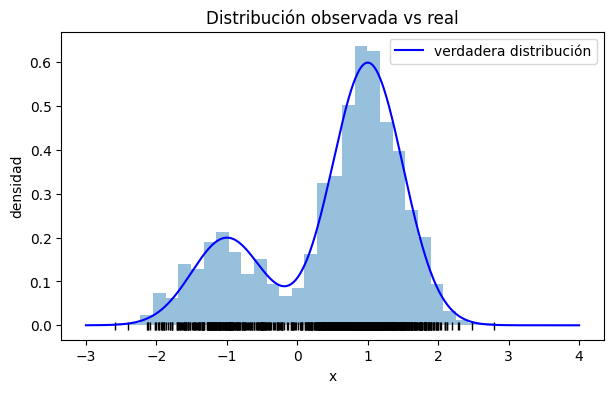

In [28]:
# Superposición de histograma con la verdadera distribución
# ==============================================================================
X_grid = np.linspace(-3, 4, 1000)
densidad = (stats.norm.pdf(loc=1, scale=0.5, x=X_grid)*0.75
              + stats.norm.pdf(loc=-1, scale=0.5, x=X_grid)*0.25)

fig, ax = plt.subplots(figsize=(7,4))
ax.hist(datos, bins=30, density=True, color="#3182bd", alpha=0.5)
ax.plot(datos, np.full_like(datos, -0.001), '|k', markeredgewidth=1)
ax.plot(X_grid, densidad, color = 'blue', label='verdadera distribución')
ax.set_title('Distribución observada vs real')
ax.set_xlabel('x')
ax.set_ylabel('densidad')
ax.legend();

In [29]:
# Ajuste del modelo KDE
# ==============================================================================
modelo_kde = KernelDensity(kernel='linear', bandwidth=1)
modelo_kde.fit(X=datos.reshape(-1, 1))

KernelDensity(bandwidth=1, kernel='linear')

In [30]:
# Predicción de densidad
# ==============================================================================
new_X = np.array([1])
log_density_pred = modelo_kde.score_samples(X=new_X.reshape(-1, 1))
#Se aplica el exponente para deshacer el logaritmo
density_pred = np.exp(log_density_pred)
density_pred

array([0.46014262])

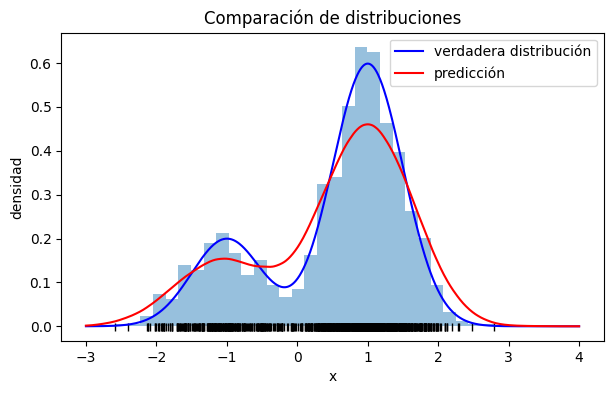

In [31]:
X_grid = np.linspace(-3, 4, 1000)
densidad_real = (stats.norm.pdf(loc=1, scale=0.5, x=X_grid)*0.75
                + stats.norm.pdf(loc=-1, scale=0.5, x=X_grid)*0.25)

log_densidad_pred = modelo_kde.score_samples(X_grid.reshape((-1,1)))
#Se aplica el exponente para deshacer el logaritmo
densidad_pred = np.exp(log_densidad_pred)

fig, ax = plt.subplots(figsize=(7,4))
ax.hist(datos, bins=30, density=True, color="#3182bd", alpha=0.5)
ax.plot(datos, np.full_like(datos, -0.001), '|k', markeredgewidth=1)
ax.plot(X_grid, densidad_real, color = 'blue', label='verdadera distribución')
ax.plot(X_grid, densidad_pred, color = 'red', label='predicción')
ax.set_title('Comparación de distribuciones')
ax.set_xlabel('x')
ax.set_ylabel('densidad')
ax.legend();

In [32]:
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
      + 'Estadistica-machine-learning-python/master/data/geyser.csv'
datos = pd.read_csv(url)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   waiting   299 non-null    int64  
 1   duration  299 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


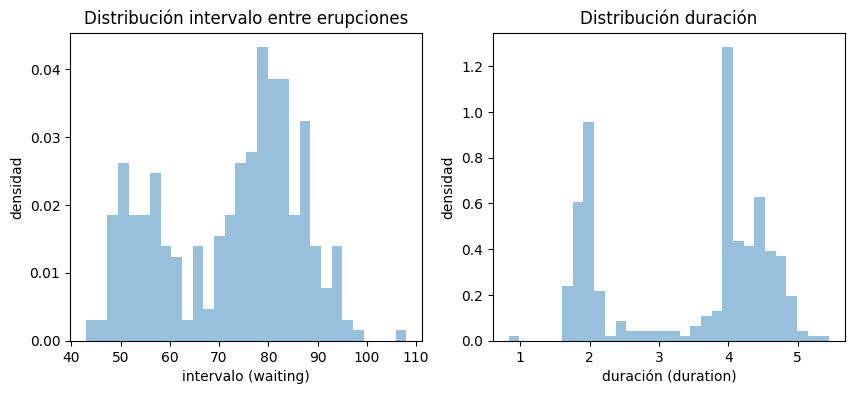

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(10,4))

axs[0].hist(datos.waiting, bins=30, density=True, color="#3182bd", alpha=0.5)
axs[0].set_title('Distribución intervalo entre erupciones')
axs[0].set_xlabel('intervalo (waiting)')
axs[0].set_ylabel('densidad')

axs[1].hist(datos.duration, bins=30, density=True, color="#3182bd", alpha=0.5)
axs[1].set_title('Distribución duración')
axs[1].set_xlabel('duración (duration)')
axs[1].set_ylabel('densidad')
plt.show()

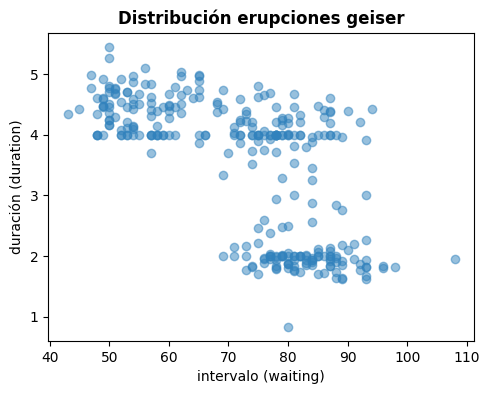

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 4))
ax.scatter(datos.waiting, datos.duration, color="#3182bd", alpha=0.5)
ax.set_title('Distribución erupciones geiser',fontsize=12,weight='bold')
ax.set_xlabel('intervalo (waiting)')
ax.set_ylabel('duración (duration)')
plt.show()

In [35]:
param_grid = {'kernel': ['gaussian', 'linear'],
              'bandwidth' : np.linspace(0.01, 3, 10)
             }

grid = GridSearchCV(
        estimator  = KernelDensity(),
        param_grid = param_grid,
        n_jobs     = -1,
        cv         = LeaveOneOut(),
        verbose    = 0
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = datos)

In [36]:
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo_kde = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'bandwidth': 1.0066666666666668, 'kernel': 'gaussian'} : -5.405507362732498 None


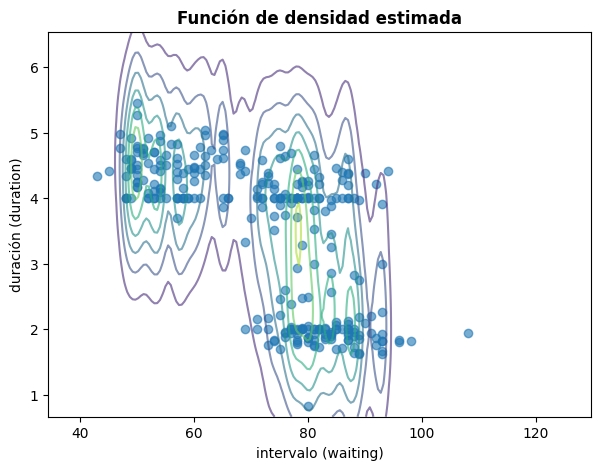

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

# Grid de valores dentro del rango observado (2 dimensiones)
x = np.linspace(min(datos.waiting)*0.8, max(datos.waiting)*1.2, 200)
y = np.linspace(min(datos.duration)*0.8, max(datos.duration)*1.2, 200)
xx, yy = np.meshgrid(x, y)
grid = np.column_stack((xx.flatten(), yy.flatten()))

# Densidad de probabilidad de cada valor del grid
log_densidad_pred = modelo_kde.score_samples(grid)
densidad_pred = np.exp(log_densidad_pred)

ax.scatter(datos.waiting, datos.duration, alpha=0.6)
ax.contour(
    xx, yy, densidad_pred.reshape(xx.shape),
    alpha =0.6
)
ax.set_title('Función de densidad estimada',fontsize=12,weight='bold')
ax.set_xlabel('intervalo (waiting)')
ax.set_ylabel('duración (duration)')
plt.show()

In [38]:
new_data = np.array([120, 1]).reshape(1, 2)
log_densidad_pred = modelo_kde.score(new_data)
densidad_pred     = np.exp(log_densidad_pred)
densidad_pred

4.6835678838332887e-35